In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import toolplot
import toolstr

from ctc.protocols import chainlink_utils
from ctc.toolbox import plot_utils

%matplotlib inline

In [2]:
toolplot.setup_plot_formatting()

# Get complete historical data for a feed

In [3]:
ETH_USD = await chainlink_utils.async_get_feed_data('ETH_USD')

ETH_USD

block_number
10606572         399.33
10606572         399.37
10606572         399.33
10606573         399.37
10606573         399.33
               ...     
15621252       1343.735
15621330        1351.14
15621393    1358.421146
15621427        1367.43
15621431    1376.321183
Name: answer, Length: 237652, dtype: object

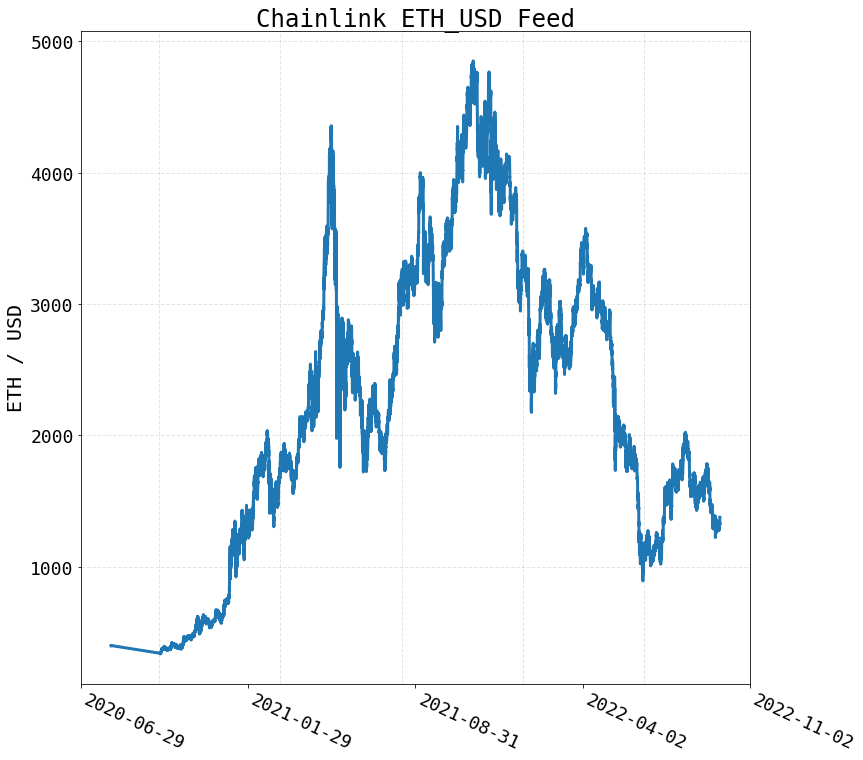

In [4]:
plt.plot(ETH_USD)
toolplot.add_tick_grid()
plt.ylabel('ETH / USD')
plt.title('Chainlink ETH_USD Feed')
await plot_utils.async_xtick_block_dates()

# Directory of feeds

In [5]:
all_feeds = await chainlink_utils.chainlink_db.async_query_feeds(network='mainnet')

pd.DataFrame(all_feeds).head(10)

,address,name,deviation,heartbeat,decimals,asset,asset_type,status
0,0x72afaecf99c9d9c8215ff44c77b94b99c28741e8,1INCH / ETH,2,24h,18,1inch,Crypto,verified
1,0xc929ad75b72593967de83e7f7cda0493458261d9,1INCH / USD,1,24h,8,1inch,Crypto,verified
2,0x139c8512cde1778e9b9a8e721ce1aebd4dd43587,AAPL / USD,0.5,24h,8,Apple,Equities,verified
3,0x6df09e975c830ecae5bd4ed9d90f3a95a4f88012,AAVE / ETH,2,24h,18,Aave,Crypto,verified
4,0x547a514d5e3769680ce22b2361c10ea13619e8a9,AAVE / USD,1,1h,8,Aave,Crypto,verified
5,0xae48c91df1fe419994ffda27da09d5ac69c30f55,ADA / USD,1,24h,8,Cardano,Crypto,verified
6,0x231e764b44b2c1b7ca171fa8021a24ed520cde10,ADX / USD,2,24h,8,Adex,Crypto,verified
7,0xb23d105df4958b4b81757e12f2151b5b5183520b,AKRO / USD,2,24h,8,Akropolis,Crypto,verified
8,0x057e52fb830318e096cd96f369f0db4b196fbfa7,ALBT / USD,2,24h,8,Aliiance Block,Crypto,monitored
9,0x194a9aaf2e0b67c35915cd01101585a33fe25caa,ALCX / ETH,2,24h,18,Alchemix,Crypto,verified


In [6]:
# query many feeds by name

BTC_USD = await chainlink_utils.async_get_feed_data('BTC_USD')
RAI_USD = await chainlink_utils.async_get_feed_data('RAI_USD')
DAI_USD = await chainlink_utils.async_get_feed_data('DAI_USD')
LINK_USD = await chainlink_utils.async_get_feed_data('LINK_USD')

# Get feed metadata

In [7]:
feed_metadata = await chainlink_utils.async_get_feed_metadata('ETH_USD')

feed_metadata

{'address': '0x5f4ec3df9cbd43714fe2740f5e3616155c5b8419',
 'name': 'ETH / USD',
 'deviation': '0.5',
 'heartbeat': '1h',
 'decimals': 8,
 'asset': 'Ethereum',
 'asset_type': 'Crypto',
 'status': 'verified'}

# Get block-by-block data

In [8]:
ETH_USD_block_by_block = await chainlink_utils.async_get_feed_data(
    'ETH_USD',
    interpolate=True,
)

ETH_USD_block_by_block

block_number
10606572     399.330000
10606573     399.320000
10606574     399.325000
10606575     399.320000
10606576     399.320000
               ...     
15621481    1376.321183
15621482    1376.321183
15621483    1376.321183
15621484    1376.321183
15621485    1376.321183
Name: answer, Length: 5014914, dtype: float64

# Get feed data over a specific time range or block range

In [9]:
ETH_USD_time_range = await chainlink_utils.async_get_feed_data(
    'ETH_USD',
    start_time='2021-01-01',
    end_time='2021-02-01',
)

ETH_USD_time_range

block_number
11565072     735.163952
11565072     735.163952
11565072     735.163952
11565072     735.163952
11565072     735.163952
               ...     
11766913    1316.520150
11766913    1316.387322
11766913    1316.520150
11766913    1316.387322
11766917    1316.520150
Name: answer, Length: 67851, dtype: float64

In [10]:
ETH_USD_block_range = await chainlink_utils.async_get_feed_data(
    'ETH_USD',
    start_block=14000000,
    end_block=15000000,
)

ETH_USD_block_range

block_number
14000260    3253.400007
14000296    3235.727318
14000342    3252.029317
14000511    3269.030674
14000780    3263.510000
               ...     
14999724    1137.080000
14999778    1129.521031
14999823    1123.680000
14999873    1127.796300
14999926    1121.372652
Name: answer, Length: 9893, dtype: float64

# Build composite feed

In [11]:
OHM_USD = await chainlink_utils.async_get_composite_feed_data(
    ['OHMv2_ETH', 'ETH_USD'],
    start_block=14900000,
    end_block=15000000,
)

OHM_USD

14900000    18.852528
14900001    18.852528
14900002    18.852528
14900003    18.852528
14900004    18.752299
              ...    
14999996    13.719747
14999997    13.719747
14999998    13.719747
14999999    13.719747
15000000    13.719747
Name: answer, Length: 100001, dtype: object

# Include timestamp data

In [12]:
ETH_USD_full = await chainlink_utils.async_get_feed_data(
    'ETH_USD',
    fields='full',
)

ETH_USD_full

,answer,timestamp,round_id
block_number,,,
10606572,399.33,1596721477,3032
10606572,399.37,1596721477,3032
10606572,399.33,1596721477,3032
10606573,399.37,1596721508,3032
10606573,399.33,1596721508,3032
...,...,...,...
15621252,1343.735,1664240159,34406
15621330,1351.14,1664241095,34407
15621393,1358.421146,1664241863,34408
